<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C1/C1.html"><img src="../data/C1_nav.png" width="100"  style="float:right;" alt="C1"></a>
<h1>Symbolic Format: Rendering</h1>        
</div>

<br />

<p>
In this notebook, we discuss some software tools for rendering sheet music. Furthermore, we explain some functionality of the Python library <code>music21</code>.
</p> 

## Extra Software

The process of sheet music rendering refers to the computerized rendition of a symbolic music format into graphical musical symbols, e.g. modern staff notation. There exist several software tools for sheet music rendering, including text-based programs like [LilyPond](http://lilypond.org) and [Verovio](https://www.verovio.org), as well as WYSIWYG sheet music editors like [MuseScore](https://musescore.org) and [Sibelius](https://www.avid.com/de/sibelius).

For rendering sheet music from Python, we recommend to use the package `music21`.
For a full introduction, we refer to the [documentation of `music21`](https://web.mit.edu/music21/doc/).
It offers various options to feed its internal data structure to a renderer.
One option is to internally convert `music21`'s data structure to the MusicXML format (for more details, see the [MusicXML notebook](../C1/C1S2_MusicXML.html)) and use MuseScore to graphically render the sheet music. With a working Python environment where `music21` is installed, three more steps are needed to get it to work.

* First, one needs to install MuseScore, which can be [downloaded freely](https://musescore.org/en/download) on its website. Second, one needs to tell `music21` the path to the MuseScore binary.
* Second, we have to set up a `music21` user environment file.
* Third, we have to register the path to MuseScore for `music21`.

Those three steps only need to be executed one time.

The following code cell sets up a `music21` user environment file:

In [1]:
import os
import music21 as m21

us = m21.environment.UserSettings()
us_path = us.getSettingsPath()
if not os.path.exists(us_path):
    us.create()
print('Path to music21 environment', us_path)
print(us)

Path to music21 environment C:\Users\stefa\AppData\Roaming\music21-settings.xml
{'directoryScratch': None, 'lilypondPath': 'C:\\Users\\stefa\\Uni\\MPA\\notebook_web\\C1\\lilypond', 'lilypondVersion': None, 'lilypondFormat': 'pdf', 'lilypondBackend': 'ps', 'musicxmlPath': None, 'midiPath': None, 'graphicsPath': None, 'vectorPath': None, 'pdfPath': None, 'braillePath': None, 'musescoreDirectPNGPath': 'C:\\Users\\stefa\\Uni\\MPA\\notebook_web\\C1\\C:\\Program Files (x86)\\MuseScore 3\\MuseScore.exe', 'showFormat': 'musicxml', 'writeFormat': 'musicxml', 'ipythonShowFormat': 'ipython.musicxml.png', 'autoDownload': 'ask', 'debug': 0, 'warnings': 1, 'localCorpusSettings': LocalCorpusSettings([]), 'localCorporaSettings': {}, 'manualCoreCorpusPath': None}


Next, we give the path to the MuseScore binary. The following code cell gives two typical locations for Linux and Windows environments. Note that this could be different on your system and has to be changed, possibly. Both, setting up the user environment file and the specification of the MuseScore path has to be executed only once.

**Note**: The following example may not work on Windows yet. The reason for this is a bug in `music21`. This was [fixed](https://github.com/cuthbertLab/music21/pull/411) and will be solved in the next version of `music21`. However, currently the fix is not included the the latest version.

In [2]:
# for linux
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['musicxmlPath'] = '/usr/bin/mscore'

# for windows
# us['musescoreDirectPNGPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe' 
# us['musicxmlPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'

UserSettingsException: attempting to set a value to a path that does not exist: \usr\bin\mscore

If the setup is correct, the following code cell should create a `music21` Note object and show its graphical rendition via MuseScore:

In [3]:
n = m21.note.Note('c')
n.show('ipython.musicxml.png')

OSError: [WinError 123] Die Syntax für den Dateinamen, Verzeichnisnamen oder die Datenträgerbezeichnung ist falsch: 'C:\\Users\\stefa\\Uni\\MPA\\notebook_web\\C1\\C:\\Program Files (x86)\\MuseScore 3\\MuseScore.exe'

Another possibility is to use [LilyPond](http://lilypond.org) for rendering. Again, we need three steps to get it to work.

* First we need to [install LilyPond](http://lilypond.org/download.html).
* Second, we have to set up the `music21` user environment file (we already did that above).
* Third, we have to register the path to Lilypond for `music21`. The following code cell again gives typical locations for Linux and Windows.

In [4]:
# for linux
us['lilypondPath'] = '/usr/local/bin/lilypond'

# for windows
# us['lilypondPath'] = r'C:\Program Files (x86)\LilyPond\usr\bin\lilypond.exe'

UserSettingsException: attempting to set a value to a path that does not exist: \usr\local\bin\lilypond

Finally, we are able to render our simple note via Lilypond:

In [5]:
n.show('ipython.lily.png')

LilyTranslateException: Cannot find a copy of Lilypond installed on your system. Please be sure it is installed. And that your environment.UserSettings()['lilypondPath'] is set to find it.

For creating a staff line with multiple notes, we add multiple `music21` objects to a `music21` Stream.

In [6]:
s = m21.stream.Stream()
s.append(m21.key.Key('E-'))
s.append(m21.meter.TimeSignature('2/4'))
s.append(m21.note.Rest(quarterLength=0.5))
s.append(m21.note.Note('g', quarterLength=0.5))
s.append(m21.note.Note('g', quarterLength=0.5))
s.append(m21.note.Note('g', quarterLength=0.5))
s.append(m21.note.Note('e-', quarterLength=2))

s.show('ipython.musicxml.png')

OSError: [WinError 123] Die Syntax für den Dateinamen, Verzeichnisnamen oder die Datenträgerbezeichnung ist falsch: 'C:\\Users\\stefa\\Uni\\MPA\\notebook_web\\C1\\C:\\Program Files (x86)\\MuseScore 3\\MuseScore.exe'

Instead of writing Python code to create a `music21` score, we can also read and display a MusicXML file.

In [7]:
fn_xml = os.path.join('..', 'data', 'C1', 'FMP_C1_F01_Beethoven_FateMotive_Sibelius.xml')
s = m21.converter.parse(fn_xml)
s.show('ipython.musicxml.png')

OSError: [WinError 123] Die Syntax für den Dateinamen, Verzeichnisnamen oder die Datenträgerbezeichnung ist falsch: 'C:\\Users\\stefa\\Uni\\MPA\\notebook_web\\C1\\C:\\Program Files (x86)\\MuseScore 3\\MuseScore.exe'

We can also read in a full orchestral score. Since such a score cannot be rendered on a single page, we can specify the measures that we want to show:

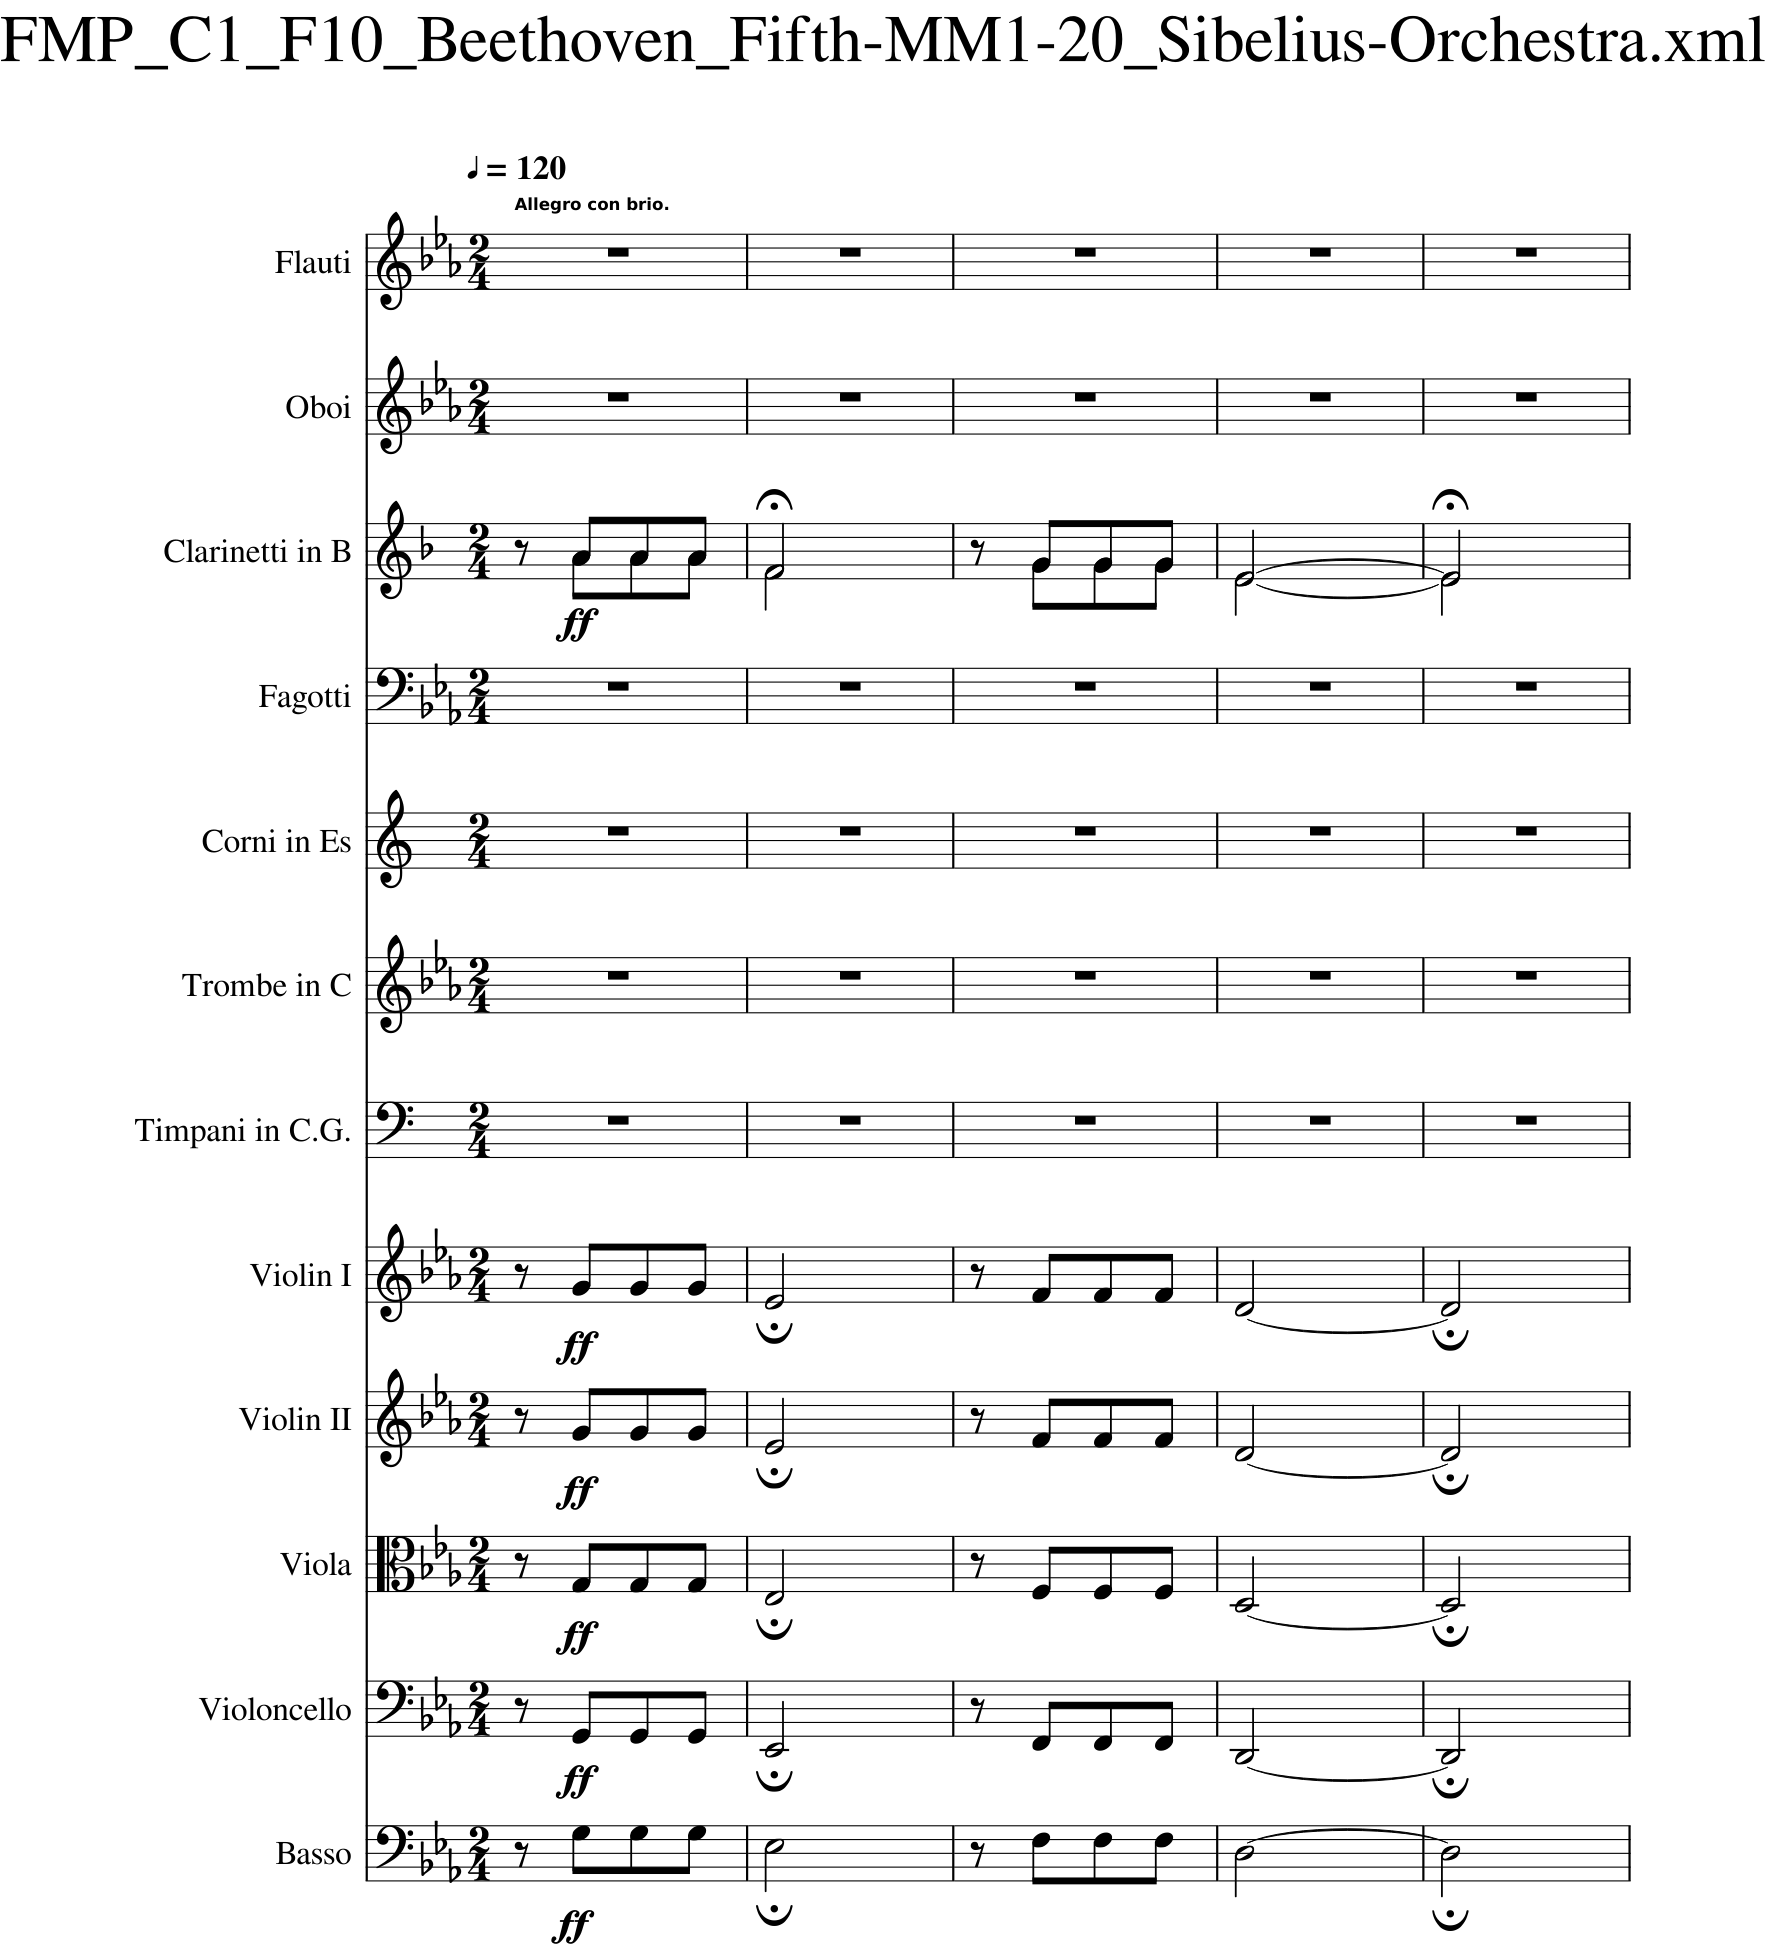

In [8]:
fn_xml = os.path.join('..', 'data', 'C1', 'FMP_C1_F10_Beethoven_Fifth-MM1-20_Sibelius-Orchestra.xml')
s = m21.converter.parse(fn_xml)
s.measures(1, 5).show('ipython.musicxml.png')

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/assistant/zalkow">Frank Zalkow</a> and <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a>.
</div>   

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>